In [1]:
# Magic Words
from __future__ import annotations
import matplotlib as mpl
import matplotlib.pyplot as plt  # noqa: F401
import seaborn as sns
import numpy as np  # noqa: F401
import pandas as pd
from collections import defaultdict, Counter  # noqa: F401
from typing import Union, Optional
from IPython.display import display, Markdown

%matplotlib inline
%load_ext wurlitzer
mpl.rcParams["font.family"] = "Noto Sans JP"
sns.set(font=["Noto Sans JP"], font_scale=1.5)
pd.set_option("display.date_yearfirst", True)
pd.set_option("display.float_format", "{:.4f}".format)


# The function displays Table or Text even inside function
def show_it(
    data: Union[str, pd.DataFrame],
    demical: Optional[int] = 4,
) -> None:
    if isinstance(data, pd.DataFrame):
        display(
            Markdown(data.to_markdown(floatfmt=f".{demical}f", intfmt=","))
        )
    else:
        display(Markdown(data.strip()))
    return

In [2]:
np.random.seed(seed=12)
vectors = np.random.rand(10000, 2) * 2 - 1

In [3]:
normed_vectors = list()
for vec in vectors:
    normed_vectors.append(
        vec / np.clip(np.linalg.norm(vec, ord=2), 1e-9, None)
    )
normed_vectors = np.array(normed_vectors)

In [4]:
from scipy.spatial.distance import cdist

euclid_distances = cdist(vectors, [[1, 0]], metric="euclidean").ravel()
cosine_distances = cdist(vectors, [[1, 0]], metric="cosine").ravel()
normed_euclid_distances = cdist(
    normed_vectors, [[1, 0]], metric="euclidean"
).ravel()
normed_cosine_distances = cdist(
    normed_vectors, [[1, 0]], metric="cosine"
).ravel()

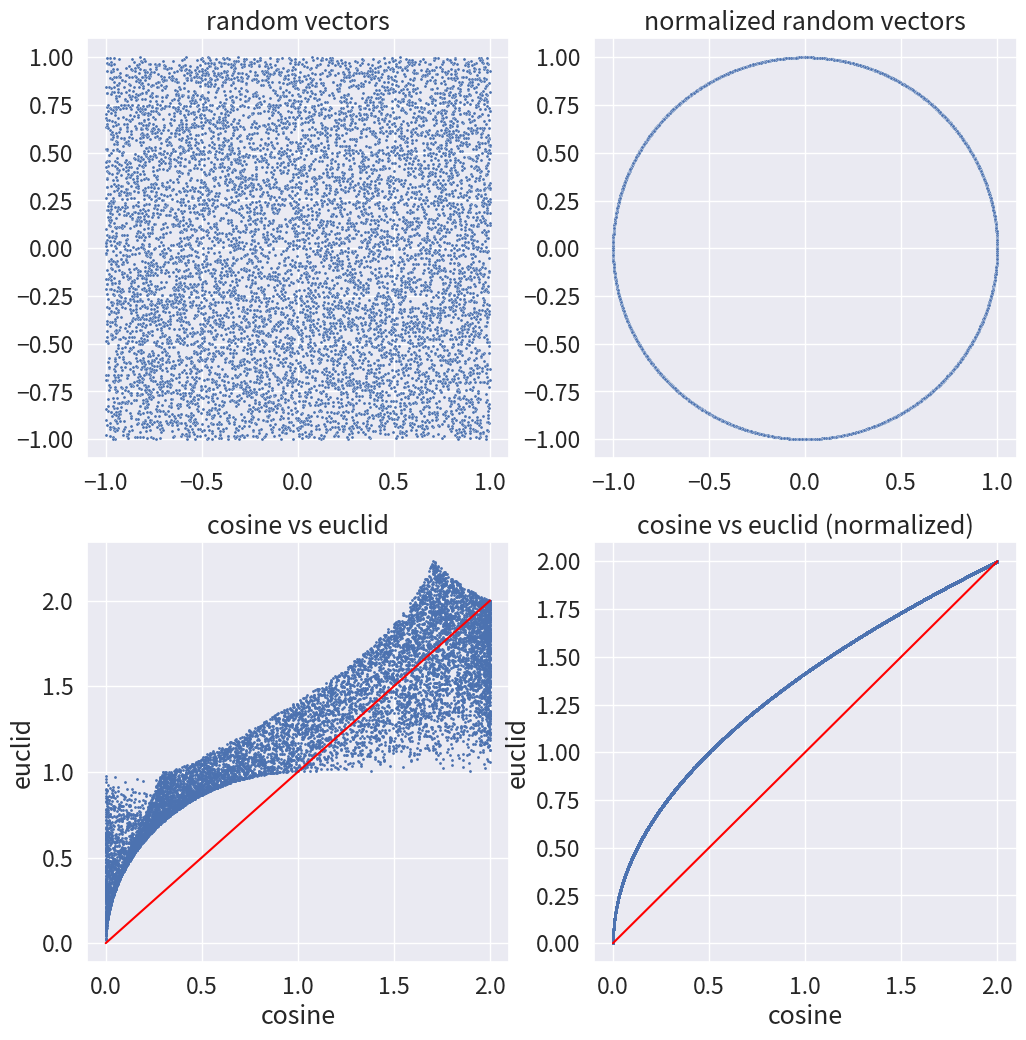

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.scatterplot(
    data=pd.DataFrame(vectors, columns=["x1", "x2"]),
    x="x1",
    y="x2",
    s=5,
    ax=axes[0, 0],
)
axes[0, 0].set_title("random vectors")
axes[0, 0].set_xlabel(None)
axes[0, 0].set_ylabel(None)
sns.scatterplot(
    data=pd.DataFrame(normed_vectors, columns=["x1", "x2"]),
    x="x1",
    y="x2",
    s=5,
    ax=axes[0, 1],
)
axes[0, 1].set_title("normalized random vectors")
axes[0, 1].set_xlabel(None)
axes[0, 1].set_ylabel(None)
pd.DataFrame(
    {
        "cosine": cosine_distances,
        "euclid": euclid_distances,
    }
).plot(kind="scatter", x="cosine", y="euclid", s=1, ax=axes[1, 0])
axes[1, 0].set_title("cosine vs euclid")
axes[1, 0].plot([0, 2], [0, 2], "-", color="red")
pd.DataFrame(
    {
        "cosine": normed_cosine_distances,
        "euclid": normed_euclid_distances,
    }
).plot(kind="scatter", x="cosine", y="euclid", s=1, ax=axes[1, 1])
axes[1, 1].set_title("cosine vs euclid (normalized)")
axes[1, 1].plot([0, 2], [0, 2], "-", color="red")
plt.show()
plt.clf()
plt.close()